# Title: Assignment 3: Analyzing Facebook Large Page-Page Network
# Author: Adams Liu - 10187602


## Introduction:
In assignment 2, you will get familier with NetworkX (https://networkx.github.io/) for network analysis (creating network, reporting network statistics, calculating three node centrality measures, and implement two link prediction methods). NetworkX has nice documentation including all graph algorithms it supports: https://networkx.github.io/documentation/stable/reference/index.html

You can always add more code/markdown cells.

## Dataset
The dataset we are using in this assignment is from Facebook. A detailed description of the dataset could be found at: https://snap.stanford.edu/data/facebook-large-page-page-network.html.

The whole network is a page-page graph of verified Facebook sites. Nodes represent official Facebook pages while the links are mutual likes between sites. Node features are extracted from the site descriptions that the page owners created to summarize the purpose of the site. This graph was collected through the Facebook Graph API in November 2017 and restricted to pages from 4 categories which are defined by Facebook. These categories are: politicians, governmental organizations, television shows and companies. 

## Important Note:
Don't forget to provide a summary of your findings/results for Task 2-4.
Submit your code (executed ipynb file) to onq.

In [0]:
 # import needed Python libraries, e.g., networkx
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

## Task 1: load dataset and create network (10 points).
Download data from https://snap.stanford.edu/data/facebook-large-page-page-network.html.
In this step, you need to load edge and node information from raw dataset. Usually, the edges and nodes are saved in csv files.
To load and create network in networkx, please read the following tutorial:https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [0]:
from google.colab import files
uploaded = files.upload()

Saving musae_facebook_edges.csv to musae_facebook_edges.csv
Saving musae_facebook_target.csv to musae_facebook_target.csv


In [0]:
with open('musae_facebook_target.csv', 'r') as nodecsv: # Open the file                       
    nodereader = csv.reader(nodecsv) # Read the csv  
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]                                                      

node_ids = [n[0] for n in nodes] # Get a list of only the node names                                       

with open('musae_facebook_edges.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv     
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

print(nodes[0])
print(edges[0])

G = nx.Graph()
G.add_nodes_from(node_ids)
G.add_edges_from(edges)


['0', '145647315578475', 'The Voice of China 中国好声音', 'tvshow']
('0', '18427')


## Task 2: network analysis, reporting basic statistics (10 points). 

Basic network statistics include:
1) number of nodes in the network
2) number of edges in the network
3) average degree of node
4) radius of the network
5) diameter of the network 
6) density of the network

ref: https://networkx.github.io/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py

Please also draw a figure representing the node degree distribution in the network.
You can get degree distribution (count how frequent each degree value appear in the network) by:

``` 
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
 ```
 
Plot the historgram distribution of degree, and then decide whether you need to create a log-log plot (using library matplotlib.pyplot) representing the degree distribution.
ref. https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html

 


In [0]:
 %time print(nx.info(G))
%time print("radius: %d" , nx.radius(G))


In [0]:
%time print("diameter: %d", nx.diameter(G))


In [0]:
%time print("density: %s" , nx.density(G))

[(0.0, 3000.0), (0.0, 150.0)]

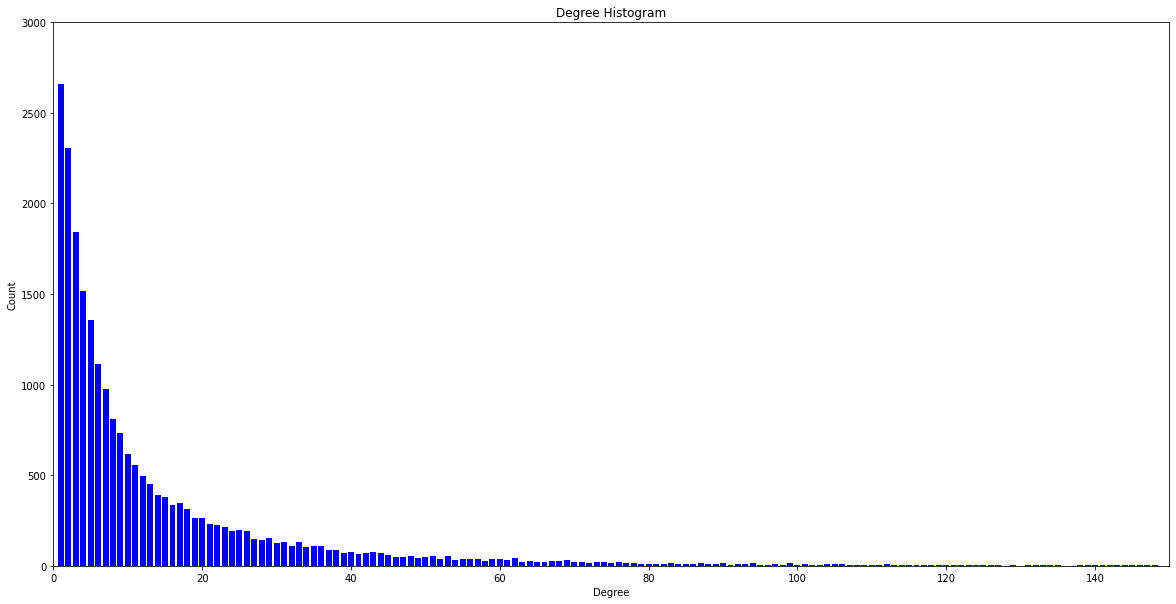

In [0]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(deg, cnt, width=0.8, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set(xlim=(0, 150), ylim=(0, 3000))


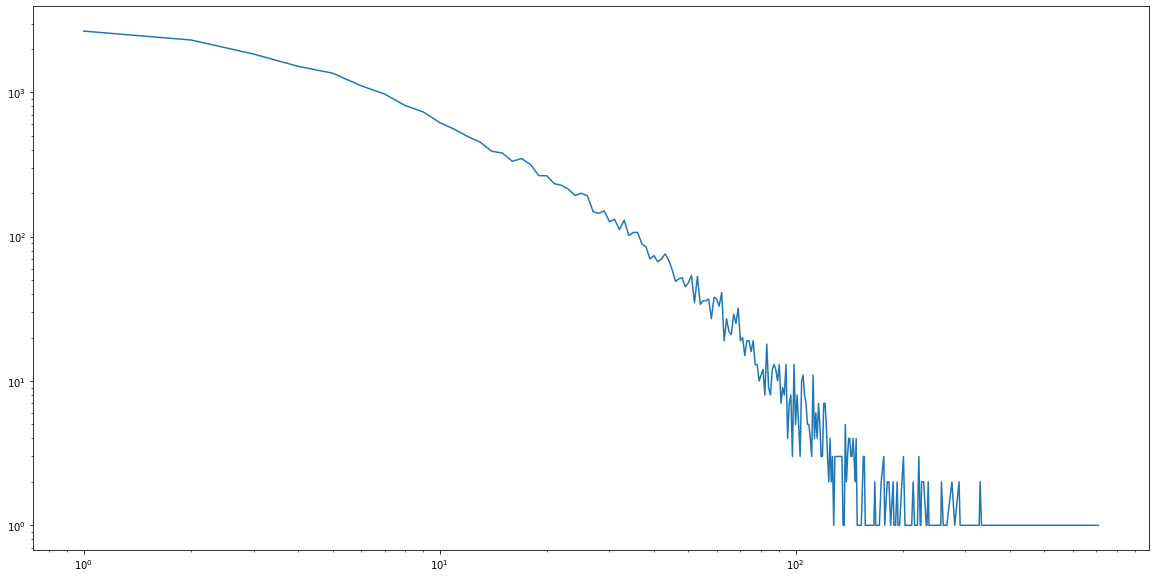

In [0]:

fig, ax = plt.subplots(figsize=(20, 10))
plt.loglog(deg,cnt)

**Findings for Task 2: Please summarize your findings from the above analysis, e.g., describe the characteristics of the network based on the network statistics.**



1) Number of Nodes: 22470

2) Number of Edges: 171002

3) Average Degree of Node: 15.2205

4) Radius of Network: 8

5) Diameter of Network: 15

6) Density of Network: 0.000677

Summary: Based on basic characteristic of the network we can conclude that this is a very large network with 22470 nodes. The network also seems to be very sparse as the density is only "0.000677" indicating that the nodes in the network aren't well connected as there are a lot of potential edges for the network. And although the average degree of the node is 15.2 the degree distribution graph indicates there being  many nodes having 1-5 degrees. The log-log plot also shows a negative exponential curve, indicating that there is a lot of nodes with smaller degrees and very few nodes with larger degrees. 

## Task 3:  Node centrality analysis (30 points)


In [0]:
#degree centrality
degree_dict = dict(G.degree(G.nodes()))


dWrite = csv.writer(open("degOutput.csv", "w"))
for key, val in degree_dict.items():
    dWrite.writerow([key, val])
files.download('degOutput.csv') 

In [0]:
#eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)

# dWrite = csv.writer(open("egVecOutput.csv", "w"))
# for key, val in eigenvector_dict.items():
#     dWrite.writerow([key, val])
# files.download('egVecOutput.csv') 

In [0]:
#betweeness centrality
betweenness_dict = nx.betweenness_centrality(G)

# dWrite = csv.writer(open("betOutput.csv", "w"))
# for key, val in betweenness_dict.items():
#     dWrite.writerow([key, val])
# files.download('betOutput.csv') 

In [0]:
#closeness centrality
closeness_dict = nx.closeness_centrality(G)

# dWrite = csv.writer(open("closeOutput.csv", "w"))
# for key, val in closeness_dict.items():
#     dWrite.writerow([key, val])
# files.download('closeOutput.csv') 


In [24]:
#All the dictionaries for the centralities were downloaded to .csv files and can be uploaded for future use without 
#having to process everything again

from google.colab import files
uploaded = files.upload()


Saving betOutput.csv to betOutput.csv
Saving closeOutput.csv to closeOutput.csv
Saving degOutput.csv to degOutput.csv
Saving egVecOutput.csv to egVecOutput.csv


In [0]:
degree_dict = {}
eigenvector_dict = {}
closeness_dict = {}
betweenness_dict = {}

with open('degOutput.csv') as deg_input:
    for row in csv.reader(deg_input):
        degree_dict[row[0]] = float(row[1])

with open('egVecOutput.csv') as egV_input:
    for row in csv.reader(egV_input):
        eigenvector_dict[row[0]] = float(row[1])

with open('closeOutput.csv') as close_input:
    for row in csv.reader(close_input):
        closeness_dict[row[0]] = float(row[1])

with open('betOutput.csv') as bet_input:
    for row in csv.reader(bet_input):
        betweenness_dict[row[0]] = float(row[1])

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_egVec = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

In [0]:
sorted_betweenness_10 = sorted_betweenness[:10]

for betweenness in sorted_betweenness_10: 
    degree = degree_dict[betweenness[0]] 
    print("Name:", betweenness[0], "| Betweenness Centrality:", betweenness[1], "| Degree:", degree)


Name: 701 | Betweenness Centrality: 0.11578961033283586 | Degree: 380.0
Name: 11003 | Betweenness Centrality: 0.0896283261419129 | Degree: 341.0
Name: 21729 | Betweenness Centrality: 0.03981995465158682 | Degree: 659.0
Name: 19743 | Betweenness Centrality: 0.03980519194848733 | Degree: 678.0
Name: 21120 | Betweenness Centrality: 0.02595360013898569 | Degree: 417.0
Name: 17983 | Betweenness Centrality: 0.022696578939963557 | Degree: 167.0
Name: 8482 | Betweenness Centrality: 0.01955731717571255 | Degree: 222.0
Name: 20415 | Betweenness Centrality: 0.01930824955251672 | Degree: 320.0
Name: 22171 | Betweenness Centrality: 0.01764088483406153 | Degree: 330.0
Name: 10379 | Betweenness Centrality: 0.015456013941175219 | Degree: 468.0


In [0]:
sorted_egVec_10 = sorted_egVec[:10]
for egVec in sorted_egVec_10: 
    print("Name:", egVec[0], "| Eigenvector Centrality:", egVec[1])

Name: 16895 | Eigenvector Centrality: 0.177817073
Name: 14497 | Eigenvector Centrality: 0.160610012
Name: 1387 | Eigenvector Centrality: 0.136352224
Name: 2442 | Eigenvector Centrality: 0.121044282
Name: 8139 | Eigenvector Centrality: 0.120839687
Name: 19743 | Eigenvector Centrality: 0.117060262
Name: 21729 | Eigenvector Centrality: 0.115842863
Name: 4502 | Eigenvector Centrality: 0.113763682
Name: 15236 | Eigenvector Centrality: 0.108154492
Name: 9220 | Eigenvector Centrality: 0.106425112


In [0]:
sorted_closeness_10 = sorted_closeness[:10]
for close in sorted_closeness_10: 
    print("Name:", close[0], "| Closeness Centrality:", close[1])

Name: 701 | Closeness Centrality: 0.3241578301954844
Name: 21729 | Closeness Centrality: 0.3174753440529008
Name: 19743 | Closeness Centrality: 0.31741255580041816
Name: 11003 | Closeness Centrality: 0.3164380474889446
Name: 22171 | Closeness Centrality: 0.3035571947743147
Name: 17983 | Closeness Centrality: 0.3020798322152162
Name: 10379 | Closeness Centrality: 0.30202704519181656
Name: 16895 | Closeness Centrality: 0.2989011866120364
Name: 11657 | Closeness Centrality: 0.2977525111976889
Name: 8482 | Closeness Centrality: 0.2974686895967379


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


[(0.0, 4000.0), (7.027721976150572e-05, 1)]

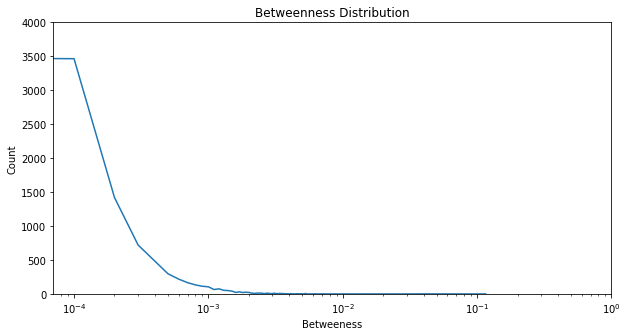

In [0]:
#betweeness plot
sorted_betweenness_round = [round(item[1],4) for item in sorted_betweenness]
betCount = collections.Counter(sorted_betweenness_round)
bet, cnt = zip(*betCount.items())
fig, ax = plt.subplots(figsize=(10, 5))
plt.xscale('log')
plt.plot(bet,cnt)
plt.title("Betweenness Distribution")
plt.ylabel("Count")
plt.xlabel("Betweeness")
ax.set(xlim=(0.0, 1), ylim=(0, 4000))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


[(0.0, 2500.0), (6.878653167131905e-05, 1)]

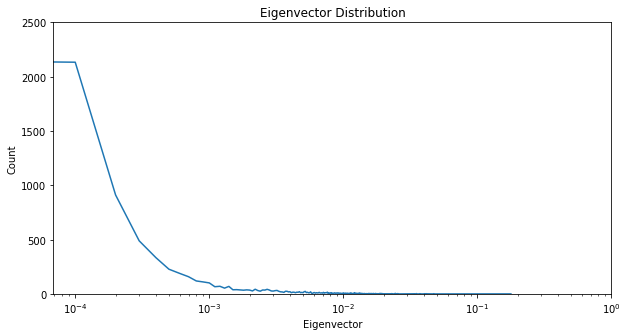

In [0]:
#eigenvector plot
sorted_egVec_round = [round(item[1],4) for item in sorted_egVec]
egVecCount = collections.Counter(sorted_egVec_round)
egV, cnt = zip(*egVecCount.items())
fig, ax = plt.subplots(figsize=(10, 5))
plt.xscale('log')
plt.plot(egV,cnt)
plt.title("Eigenvector Distribution")
plt.ylabel("Count")
plt.xlabel("Eigenvector")
ax.set(xlim=(0.0, 1), ylim=(0, 2500))

[(0.0, 60.0), (0.05, 0.35)]

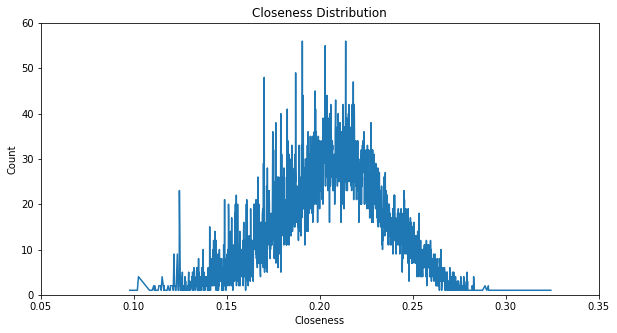

In [0]:
#closeness plot
sorted_closeness_round = [round(item[1],4) for item in sorted_closeness]
closeCount = collections.Counter(sorted_closeness_round)
close, cnt = zip(*closeCount.items())
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(close,cnt)
plt.title("Closeness Distribution")
plt.ylabel("Count")
plt.xlabel("Closeness")
ax.set(xlim=(0.05, 0.35), ylim=(0, 60))

Pick three centrality metrics that you are interested to invesitgate and report at least three findings (e.g., what are the nodes with high centrality values, how the centrality values distributed in the network)
Ref: https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

##**Task 3 Results**


The 3 centrality measures I decided to use was, betweenness, eigenvector, and closeness. The top 10 results for each measure are the following:


**Betweeness Centrality:**

1. Name: 701 | Betweenness Centrality: 0.11578961033283586 | Degree: 380.0
2. Name: 11003 | Betweenness Centrality: 0.0896283261419129 | Degree: 341.0
3. Name: 21729 | Betweenness Centrality: 0.03981995465158682 | Degree: 659.0
4. Name: 19743 | Betweenness Centrality: 0.03980519194848733 | Degree: 678.0
5. Name: 21120 | Betweenness Centrality: 0.02595360013898569 | Degree: 417.0
6. Name: 17983 | Betweenness Centrality: 0.022696578939963557 | Degree: 167.0
7. Name: 8482 | Betweenness Centrality: 0.01955731717571255 | Degree: 222.0
8. Name: 20415 | Betweenness Centrality: 0.01930824955251672 | Degree: 320.0
9. Name: 22171 | Betweenness Centrality: 0.01764088483406153 | Degree: 330.0
10. Name: 10379 | Betweenness Centrality: 0.015456013941175219 | Degree: 468.0

**Eigenvector Centrality:**

1. Name: 16895 | Eigenvector Centrality: 0.177817073
2. Name: 14497 | Eigenvector Centrality: 0.160610012
3. Name: 1387 | Eigenvector Centrality: 0.136352224
4. Name: 2442 | Eigenvector Centrality: 0.121044282
5. Name: 8139 | Eigenvector Centrality: 0.120839687
6. Name: 19743 | Eigenvector Centrality: 0.117060262
7. Name: 21729 | Eigenvector Centrality: 0.115842863
8. Name: 4502 | Eigenvector Centrality: 0.113763682
9. Name: 15236 | Eigenvector Centrality: 0.108154492
10. Name: 9220 | Eigenvector Centrality: 0.106425112


** Closeness Centrality:**

1. Name: 701 | Closeness Centrality: 0.3241578301954844
2. Name: 21729 | Closeness Centrality: 0.3174753440529008
3. Name: 19743 | Closeness Centrality: 0.31741255580041816
4. Name: 11003 | Closeness Centrality: 0.3164380474889446
5. Name: 22171 | Closeness Centrality: 0.3035571947743147
6. Name: 17983 | Closeness Centrality: 0.3020798322152162
7. Name: 10379 | Closeness Centrality: 0.30202704519181656
8. Name: 16895 | Closeness Centrality: 0.2989011866120364
9. Name: 11657 | Closeness Centrality: 0.2977525111976889
10. Name: 8482 | Closeness Centrality: 0.2974686895967379


**Summary**
1. The node with the highest betweeness centrality is node 701 with a score of 0.12. This is a very high score considering how large this network is. The company who owns this node is actually "Facebook" themselves. This would make sense as it means that in many cases 2 nodes connected to eachother would have a mutual connection of liking Facebook's facebook page. What is also interesting to note is the degree of the top 10 nodes. All of them have a degree ranging from 150-500 which is very large considering the average degrees (as previously discussed) was only 15.2 degrees. Lastly, if we look at the betweenness disitribution curve we can see that there many nodes with small betweeness and very little nodes with small betweenness.


2. The node with the highest eigenvector centrality is node 16895 with a score of 0.18. And the company for this node is the US Army facebook page, another very believable node to have the largest score. This means that pages that like the US Army's page are also nodes/companies with very large influence. Next,the distribution curve of the eigenvector centrality is shaped the same as the betweenness distribution. Having many nodes with very small eigenvector score, and very few nodes with small eigenvector score.


3. The node with the highest closeness centrality score is also node 701 with a score of 0.32. This again would make sense as this is Facebook's page. This means that Facebook's node would be the most ideal node with the shortest distance to every other node. Also 7 nodes from the top 10 nodes for highest closeness is also in the top 10 for highest betweenness, meaning closeness and betweenness are somewhat related. Also, looking at the distribution for the closeness, we can see a normal distribution curve. This indicates that most nodes are fairly accessible to every other node in the network (somewhere in the middle) with a closeness score of around 0.22, with few nodes in the outskirts of the network and few nodes in the dead center of the network.



4. 2 nodes were in the top 10 for all 3 centralities. Node 21729, "Obama Whitehouse", and node 19743, "Whitehouse". Both of these pages are basically related to the same thing, and see these pages being very popular gives a good indication of how popular US politics are on Facebook. 

Findings for Task 3: Please summarize your findings from the above analysis


## Task 4:  link prediction (40 points).
Pick one unsupervised and one supervised link prediction algorithm, implement the algorithms and compare the performance of two approaches. 
You must consider at least one ranking based evaluation metric and one classification based evalution metric.

Ref.https://github.com/lucashu1/link-prediction/blob/master/link-prediction-baselines.ipynb
https://github.com/lucashu1/link-prediction/blob/master/node2vec.ipynb


In [0]:
from google.colab import files
uploaded = files.upload()


Saving companylink.csv to companylink.csv


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/python modules')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import edgeSplitter
import node2vec
from gensim.models import Word2Vec


In [0]:

g_nx = nx.read_edgelist("companylink.csv", delimiter=",")

np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(g_nx)

# Perform train-test split, note the current code also provides a validation set. train edges adn test edges represent the true edges, false edges are randomly generated.
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, test_edges, test_edges_false = edgeSplitter.mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)

g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges


In [0]:
print(nx.info(g_nx),"\n")
print("Total nodes:", adj_sparse.shape[0])

print("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print("Training edges (positive):", len(train_edges))
print("Training edges (negative):", len(train_edges_false))
print("Validation edges (positive):", len(val_edges))
print("Validation edges (negative):", len(val_edges_false))
print("Test edges (positive):", len(test_edges))
print("Test edges (negative):", len(test_edges_false))

Name: 
Type: Graph
Number of nodes: 6373
Number of edges: 20145
Average degree:   6.3220 

Total nodes: 6373
Total edges: 20089
Training edges (positive): 12021
Training edges (negative): 12021
Validation edges (positive): 2003
Validation edges (negative): 2003
Test edges (positive): 6010
Test edges (negative): 6010


In [0]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj_sparse[edge[0], edge[1]]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj_sparse[edge[0], edge[1]]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score



In [0]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

In [0]:
# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.7553969258113903
Jaccard Coefficient Test AP score:  0.7546932829064197


In [0]:
P = 1 # Return hyperparameter
Q = 1 # In-out hyperparameter
WINDOW_SIZE = 10 # Context size for optimization
NUM_WALKS = 10 # Number of walks per source
WALK_LENGTH = 80 # Length of walk per source
DIMENSIONS = 128 # Embedding dimension
DIRECTED = False # Graph directed/undirected
WORKERS = 8 # Num. parallel workers
ITER = 1 # SGD epochs

In [0]:
# Preprocessing, generate walks
g_n2v = node2vec.Graph(g_train, DIRECTED, P, Q) # create node2vec graph instance
g_n2v.preprocess_transition_probs()
walks = g_n2v.simulate_walks(NUM_WALKS, WALK_LENGTH)
walks = [list(map(str, walk)) for walk in walks] 
# Train skip-gram model
model = Word2Vec(walks, size=DIMENSIONS, window=WINDOW_SIZE, min_count=0, sg=1, workers=WORKERS, iter=ITER)

# Store embeddings mapping
emb_mappings = model.wv

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [0]:
# Create node embeddings matrix (rows = nodes, columns = embedding features)
emb_list = []
for node_index in range(0, adj_sparse.shape[0]):
    node_str = str(node_index)
    node_emb = emb_mappings[node_str]
    emb_list.append(node_emb)
emb_matrix = np.vstack(emb_list)

In [0]:
# Generate bootstrapped edge embeddings (as is done in node2vec paper)
    # Edge embedding for (v1, v2) = hadamard product of node embeddings for v1, v2
def get_edge_embeddings(edge_list):
    embs = []
    for edge in edge_list:
        node1 = edge[0]
        node2 = edge[1]
        emb1 = emb_matrix[node1]
        emb2 = emb_matrix[node2]
        edge_emb = np.multiply(emb1, emb2)
        embs.append(edge_emb)
    embs = np.array(embs)
    return embs

In [0]:
# Train-set edge embeddings
pos_train_edge_embs = get_edge_embeddings(train_edges)
neg_train_edge_embs = get_edge_embeddings(train_edges_false)
train_edge_embs = np.concatenate([pos_train_edge_embs, neg_train_edge_embs])

# Create train-set edge labels: 1 = real edge, 0 = false edge
train_edge_labels = np.concatenate([np.ones(len(train_edges)), np.zeros(len(train_edges_false))])

# Val-set edge embeddings, labels
pos_val_edge_embs = get_edge_embeddings(val_edges)
neg_val_edge_embs = get_edge_embeddings(val_edges_false)
val_edge_embs = np.concatenate([pos_val_edge_embs, neg_val_edge_embs])
val_edge_labels = np.concatenate([np.ones(len(val_edges)), np.zeros(len(val_edges_false))])

# Test-set edge embeddings, labels
pos_test_edge_embs = get_edge_embeddings(test_edges)
neg_test_edge_embs = get_edge_embeddings(test_edges_false)
test_edge_embs = np.concatenate([pos_test_edge_embs, neg_test_edge_embs])

# Create val-set edge labels: 1 = real edge, 0 = false edge
test_edge_labels = np.concatenate([np.ones(len(test_edges)), np.zeros(len(test_edges_false))])

In [0]:
# Train logistic regression classifier on train-set edge embeddings
from sklearn.linear_model import LogisticRegression
edge_classifier = LogisticRegression(random_state=0)
edge_classifier.fit(train_edge_embs, train_edge_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicted edge scores: probability of being of class "1" (real edge)
val_preds = edge_classifier.predict_proba(val_edge_embs)[:, 1]
val_roc = roc_auc_score(val_edge_labels, val_preds)
val_ap = average_precision_score(val_edge_labels, val_preds)

In [0]:
# Predicted edge scores: probability of being of class "1" (real edge)
test_preds = edge_classifier.predict_proba(test_edge_embs)[:, 1]
test_roc = roc_auc_score(test_edge_labels, test_preds)
test_ap = average_precision_score(test_edge_labels, test_preds)

##Findings for Task 4: Please summarize the performance of two approaches.

For task 4 only the link edges for company type facebook pages were used. 2 link prediction models were evaluated. These were the Jaccard Coeffecient for the unsupervised model and the Skip-Gram for the supervised learning model, the prediction classifier that was used for this was Logistic Regression. 

The network dataset was split into 60% training data, 30% testing data, and 10% validation data. However, only the supervised model uses the validation dataset. 

The results of the following are shown below.

**Unsupervised**

Jaccard Coefficient Test ROC score:  0.7553969258113903

Jaccard Coefficient Test AP score:  0.7546932829064197

**Supervised**

node2vec Test ROC score:  0.9113849629430706

node2vec Test AP score:  0.9296911207865654

node2vec Validation ROC score:  0.9278889952639688

node2vec Validation AP score:  0.9409802002071113




## Task 5:  take-away message (10 points)
Please summary your findings from the above analysis (at least 2 findings):

1. Using a classification based evaluation like Area under curve(AUC-ROC) and a ranking based evaluation like Average Percision (AP). It turns out the results end up being very similiar, for example the Jaccard Coeffeicient for both ROC and AP are both ~0.75 and the node2vec test score is ~0.91 for ROC and ~0.93 AP. Therefore, choosing a ranking based evaluation vs a classification based approach doesn't seem to make much of a difference, either one works when it comes to link prediction.


2. When comparing evaluation scores for the supervised model (skip-gram) and the unsupervised model (jaccard coefficient). The supervised model outperforms the unsupervised one significiantly for both ROC and AP. This would be expected as supervised models usually perform better, as they have the ability train the model with multiple iterations. However, for social networks unsupervised learning seems like the more sensible approach, the model will want to make recommendations or predictions of likely links before it happens. The need for labelled data isn't realistic in real life networks. Therefore, more research is needed to be done in the social networking domain.   